In [9]:
import numpy as np

block = 100

with open("./uncertainty_data/block{}.txt".format(block), "r") as file:
    lines = file.readlines()

energies, uncertainties, distances = [], [], []
    
for line in lines:
    distance, energy, uncertainty = line.split()[0], line.split()[1], line.split()[-1]
    distances.append(float(distance)*1.242)
    energies.append(float(energy))
    uncertainties.append(float(uncertainty))

index = np.argsort(distances)
distances = np.array(distances)[index]
energies = np.array(energies)[index]
uncertainties = np.array(uncertainties)[index]

print(energies)
print(uncertainties)

energies -= min(energies)

[-182.258731 -214.188903 -238.562863 -257.059741 -270.868628 -280.923427
 -288.016012 -293.070542 -296.365162 -298.446738 -299.822064 -300.234851
 -300.504852 -300.674529 -300.690167 -300.717877 -300.60654  -300.495803
 -300.34958  -299.894232 -299.373794 -298.800347 -298.737624 -298.443929
 -298.049286 -297.647097 -297.402802 -295.854027 -294.947184 -294.301038
 -293.957122 -293.911286 -293.720631 -293.560608 -293.438525]
[0.026687 0.018585 0.036779 0.037214 0.034038 0.04092  0.038699 0.0357
 0.024533 0.042114 0.033079 0.064735 0.038847 0.0315   0.087375 0.0444
 0.10042  0.038484 0.068044 0.041487 0.042934 0.079375 0.028494 0.042461
 0.039987 0.040227 0.042366 0.099058 0.228054 0.295048 0.468553 0.463378
 0.583592 0.628967 0.597425]


In [2]:
from ase.io.trajectory import TrajectoryWriter as tw
from ase.io.trajectory import TrajectoryReader as tr

import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

from publish_format import useLargeSize

/gpfs/data/brubenst/chuang25/pythonvirtualenv/ml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


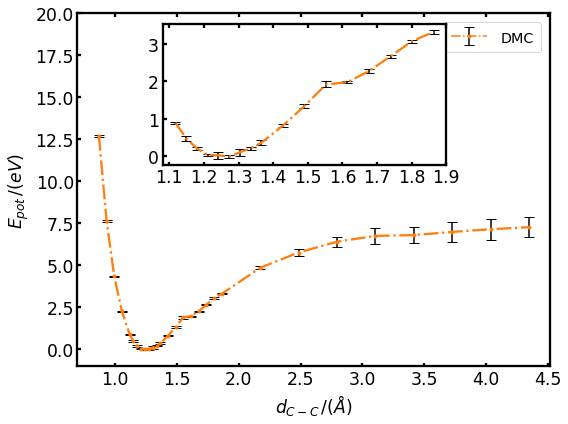

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(distances[6:], energies[6:], yerr=uncertainties[6:], ecolor="k", capsize=5, c="tab:orange", fmt=".", linestyle="dashdot", label="DMC")

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax, [0.18, 0.57, 0.6, 0.4])
# ip = inset_axes(ax, [0.56, 0.09, 0.4, 0.4])
start, end = 10, 27
ax2.set_axes_locator(ip)

ax2.errorbar(distances[start:end], energies[start:end], yerr=uncertainties[start:end], ecolor="k", capsize=5, c="tab:orange", linestyle="dashdot", label="DMC")

ax.legend(fontsize=18)
ax.set_ylim(-1, 20)
ax.set_xlabel(r"$d_{C-C}\,/(\AA$)")
ax.set_ylabel(r"$E_{pot}\,/(eV)$")
useLargeSize(plt, ax)
useLargeSize(plt, ax2)

plt.savefig("./uncertainty_data/block{}.png".format(block), dpi=200)